In [1]:
import math
import numpy as np
import h5py
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops
from tf_utils import  random_mini_batches, convert_to_one_hot, predict, loading_train_test, loading_source_new, loading_target1, loading_target2, loading_target3, loading_sketch, loading_clipart 
from sklearn.covariance import EmpiricalCovariance

In [2]:
#Loading the data
X_source, Y_source, X_test_source1, Y_test_source1= loading_clipart()
X_target1, Y_target1, X_test_target1, Y_test_target1  = loading_sketch()

In [3]:
#Converting to numpy array
X_source=X_source.to_numpy()
Y_source=Y_source.to_numpy()
X_test_source1=X_test_source1.to_numpy()
Y_test_source1=Y_test_source1.to_numpy()

X_target1=X_target1.to_numpy()
Y_target1=Y_target1.to_numpy()
X_test_target1=X_test_target1.to_numpy()
Y_test_target1=Y_test_target1.to_numpy()

In [4]:
Y_source=Y_source-1
Y_test_source1=Y_test_source1-1
Y_target1=Y_target1-1
Y_test_target1=Y_test_target1-1

In [5]:
Y_source=Y_source.astype(int)
Y_test_source1=Y_test_source1.astype(int)
Y_target1=Y_target1.astype(int)
Y_test_target1=Y_test_target1.astype(int)

Y_source = np.eye(345)[Y_source.reshape(-1)].T

Y_test_source1= np.eye(345)[Y_test_source1.reshape(-1)].T
Y_target1 = np.eye(345)[Y_target1.reshape(-1)].T

Y_test_target1 = np.eye(345)[Y_test_target1.reshape(-1)].T

X_source=X_source.T
X_test_source1=X_test_source1.T
X_target1=X_target1.T
X_test_target1=X_test_target1.T




(2048, 34019)
(345, 34019)
(2048, 14814)
(345, 14814)
(2048, 49115)
(345, 49115)
(2048, 21271)
(345, 21271)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
#Estimating the covariance matrix
cov_source = np.cov(X_source)
cov_target = np.cov(X_target1)
print(cov_source.shape)
print(cov_target.shape)

(2048, 2048)
(2048, 2048)


In [7]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, shape=[n_x, None])
    Y = tf.placeholder(tf.float32, shape=[n_y, None])
    ### END CODE HERE ###
    
    return X, Y

In [8]:
def initialize_parameters_source():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [6, 25]
                        b2 : [6, 1]
                        
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2
    """
    
    tf.set_random_seed(1)                   
        
    
    W1 = tf.get_variable("W1", [40000,2048], initializer = tf.glorot_uniform_initializer(seed = 1))
    b1 = tf.get_variable("b1", [40000,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [345,40000], initializer = tf.glorot_uniform_initializer(seed = 1))
    b2 = tf.get_variable("b2", [345,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  }
    
    return parameters

In [9]:
def initialize_parameters_target():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [6, 25]
                        b2 : [6, 1]
                        
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2
    """
    
    tf.set_random_seed(1)                   
        
    
    W1 = tf.get_variable("W1", [40000,2048], initializer = tf.glorot_uniform_initializer(seed = 1))
    b1 = tf.get_variable("b1", [40000,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [345,40000], initializer = tf.glorot_uniform_initializer(seed = 1))
    b2 = tf.get_variable("b2", [345,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  }
    
    return parameters

In [10]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    
                  
    #Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    #A1 = tf.nn.relu(Z1)                                            
    #Z2 = tf.add(tf.matmul(W2,A1),b2)   
    Z1=tf.matmul(W1,X)
    A1= tf.nn.relu(Z1)
    Z2 =tf.matmul(W2,A1)
    # Z2 =tf.add(tf.matmul(W2,A1),b2)    
                                                                                            
    
    
    return Z2

In [11]:
def forward_propagation_1(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    
                  
    #Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    #A1 = tf.nn.relu(Z1)                                            
    #Z2 = tf.add(tf.matmul(W2,A1),b2)   
    Z2=tf.matmul(W1,X)
    #A1= tf.nn.relu(Z1)
    #Z2 =tf.matmul(W2,A1)
    # Z2 =tf.add(tf.matmul(W2,A1),b2)    
                                                                                            
    
    
    return Z2

In [12]:
def compute_cost1(Z2, Y):
    
    
    cost1=tf.square(Y-Z2)
    #logits = tf.transpose(Z2)
    #labels = tf.transpose(Y)
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost1

In [14]:
def compute_cost(Z2, Y):
    
    
    cost1=tf.reduce_mean(tf.square(Y-Z2))
    #logits = tf.transpose(Z2)
    #labels = tf.transpose(Y)
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost1

In [15]:
def model(X_train, Y_train,X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 220, minibatch_size = 128, print_cost = True, source=True, target=True):
    """
    
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables                            # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    
    X, Y = create_placeholders(n_x, n_y)
   

    # Initialize parameters
    if source==True and target==False:  
        parameters = initialize_parameters_source()
        print("source")
    if source==False and target==True:
        parameters = initialize_parameters_target()
        print("target")
   # if Method2==True and Method3==False:
    #    parameters=initialize_parameters_target_method2()
     #   print(Method2)
    #if Method3==True and Method2==False:
     #   parameters=initialize_parameters_target_method3()
      #  print("Method3")
        
    
    # Forward propagation
   
    Z2 = forward_propagation(X, parameters)
    
    
    # Cost function: Add cost function to tensorflow graph
    
    cost = compute_cost(Z2, Y)
    cost1 = compute_cost1(Z2, Y)
    
    
    # Backpropagation: Define the tensorflow optimizer.
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / minibatch_size

            # Print the cost every epoch
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
       
        
        
        #hello = sess.run(cost, feed_dict={X: X_test, Y: Y_test})
            
        
        Error1 = sess.run(cost1, feed_dict={X: X_test, Y: Y_test})
        #Error1 = sess.run(cost1, feed_dict={X_target: X_test_target, Y_target: Y_test_target})
        y11=np.sum(Error1, axis=0)
        y11_mean=np.mean(y11)
        print(y11_mean)

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters, Error1, y11_mean

source
Cost after epoch 0: 0.026439
Cost after epoch 10: 0.002314
Cost after epoch 20: 0.000923
Cost after epoch 30: 0.000418
Cost after epoch 40: 0.000295
Cost after epoch 50: 0.000249
Cost after epoch 60: 0.000221
Cost after epoch 70: 0.000207
Cost after epoch 80: 0.000195
Cost after epoch 90: 0.000187
Cost after epoch 100: 0.000182
Cost after epoch 110: 0.000174
Cost after epoch 120: 0.000170
Cost after epoch 130: 0.000166
Cost after epoch 140: 0.000163
Cost after epoch 150: 0.000161
Cost after epoch 160: 0.000158
Cost after epoch 170: 0.000155
Cost after epoch 180: 0.000152
Cost after epoch 190: 0.000151
Cost after epoch 200: 0.000148
Cost after epoch 210: 0.000146


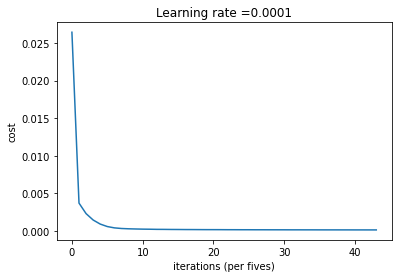

Parameters have been trained!
0.54902345
Train Accuracy: 0.9840089
Test Accuracy: 0.6576887


In [18]:
parameters, Error1, y11_mean = model(X_source, Y_source,X_test_source1,Y_test_source1,source=True, target=False)

In [19]:
parameterssource=parameters

target
Cost after epoch 0: 0.026924
Cost after epoch 10: 0.004274
Cost after epoch 20: 0.001716
Cost after epoch 30: 0.000764
Cost after epoch 40: 0.000531
Cost after epoch 50: 0.000442
Cost after epoch 60: 0.000387
Cost after epoch 70: 0.000348
Cost after epoch 80: 0.000321
Cost after epoch 90: 0.000300
Cost after epoch 100: 0.000282
Cost after epoch 110: 0.000267
Cost after epoch 120: 0.000255
Cost after epoch 130: 0.000245
Cost after epoch 140: 0.000234
Cost after epoch 150: 0.000229
Cost after epoch 160: 0.000222
Cost after epoch 170: 0.000215
Cost after epoch 180: 0.000210
Cost after epoch 190: 0.000205
Cost after epoch 200: 0.000202
Cost after epoch 210: 0.000196


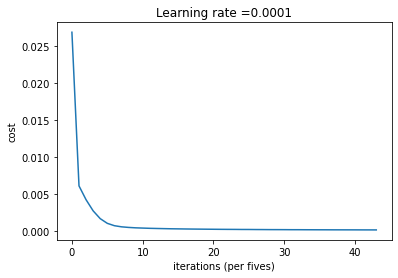

Parameters have been trained!
0.6781151
Train Accuracy: 0.9896162
Test Accuracy: 0.5123407


In [21]:
parameterstarget, Error_target, e1=model(X_target1, Y_target1,X_test_target1,Y_test_target1,source=False, target=True)

In [22]:
from scipy.linalg import sqrtm
from numpy import linalg
u_t, s_t, vh_t = np.linalg.svd(parameterstarget["W2"], full_matrices=True)
u_s, s_s, vh_s = np.linalg.svd(parameterssource["W2"], full_matrices=True)
u_s1, s_s1, vh_s1 = np.linalg.svd(np.dot(sqrtm(cov_source),np.linalg.pinv(sqrtm(cov_source))), full_matrices=True)
S_T1=np.abs(s_t)
S_S1=np.abs(s_s)
S_S2=np.abs(s_s1)
r_T=np.max(S_T1)*np.max(S_T1)
r_S=np.max(S_S1)*np.max(S_S1)*np.max(S_S2)*np.max(S_S2)
print("r_T",r_T)
print("r_S",r_S)

r_T 2.5883949
r_S 2.24731492996224


In [23]:
sigma_min=np.min(S_T1)*np.min(S_T1)
print(sigma_min)

0.24952744


In [24]:
A=np.dot(sqrtm(cov_target),parameterssource["W1"].T-parameterstarget["W1"].T)
Delta=linalg.norm(A,'fro')
print("Delta:", Delta)

Delta: 202.15795760792923


In [26]:
#computing the noise parameter in the theorem. Since the noise levels of source and target are not equal, we take minimum of them
sigma_noise=min(e1,y11_mean)
print(sigma_noise)

0.54902345
